In [3]:
import re
import glob
import json
import random
from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
paths = [
    "OPT_1.2B_ep_1_aspirin_0.4_sf_1000K_gen_1000000.csv",
    "OPT_1.2B_ep_1_sas_3_sf_1000K_gen_1000000.csv",
    "OPT_1.2B_ep_1_druglike_0.4_sf_1000K_gen_1000000.csv",
    "OPT_1.2B_ep_1_equal_dist_sf_1000K_gen_1000000.csv"
]
paths

['OPT_1.2B_ep_1_aspirin_0.4_sf_1000K_gen_1000000.csv',
 'OPT_1.2B_ep_1_sas_3_sf_1000K_gen_1000000.csv',
 'OPT_1.2B_ep_1_druglike_0.4_sf_1000K_gen_1000000.csv',
 'OPT_1.2B_ep_1_equal_dist_sf_1000K_gen_1000000.csv']

In [5]:
smiles_data = {}

for path in paths:
    subset_name = path.split("ep_1_")[1].split("_sf")[0]
    smiles_data[subset_name] = []

    with open(path, "r") as file_1:
        data = file_1.read().splitlines()   
        for line_str in tqdm(data):
            try:
                canon_sm = Chem.MolToSmiles(Chem.MolFromSmiles(line_str), canonical=True)
            except:
                print("error")    
                
            smiles_data[subset_name].append(canon_sm)

 47%|████▋     | 472319/1000192 [00:48<00:53, 9823.39it/s]

error


100%|██████████| 1000192/1000192 [01:42<00:00, 9784.02it/s]


In [7]:
smiles_data["aspirin_0.4"][:3]

['CC(O)C=CC(=O)C=COC(C)C', 'CC(O)C(C)(C)C1CC1COC=O', 'O=CCC1CC2OC(CC1O)C2=O']

In [15]:
# making unique counts
for k in smiles_data:
    smiles_data[k] = list(set(smiles_data[k][:938452]))
    print(len(smiles_data[k]))

938452
938452
938452
938452


In [7]:
Chem.MolFromSmiles(smiles_data["aspirin_0.4"][0]).GetNumHeavyAtoms()

13

In [16]:
df = pd.DataFrame(smiles_data)
df.head()

,aspirin_0.4,sas_3,druglike_0.4,equal_dist
0,CC(O)C=CC(=O)C=COC(C)C,C=C1COc2cnc(CC)cc21,CC1(CO)C2C(=O)NC(=O)C(O)C21,CCN(NC=N)C(=NC1CC1)OC
1,CC(O)C(C)(C)C1CC1COC=O,Cc1c(N)cc2ncnc-2cc1O,C#CC=NNc1cc(N)c[nH]c1=O,CNN=C(C#CCC1(C)CC1)NC
2,O=CCC1CC2OC(CC1O)C2=O,CCNC(=O)C(CC)(CC)C(=O)O,Cc1oc(O)c2c1C1CC(O)C2N1,C=COC=CC12CC(C)OC(C1)C2
3,CCC1C(O)C2OC(C2=O)C1O,CNCC(=O)Nc1cc(C)c(N)o1,CNc1cc(=O)c(CO)c(N)cn1,CC1(C)NN=C2CN=CN(C=O)C21
4,C#CC(C)OC1C(O)C1(C#N)C=O,CCOC(=O)c1ccc(O)nc1N,CCOC(=O)c1ccc(O)nc1N,Cc1[nH]nnc1C(C)CCC(=O)O


In [9]:
len(df)

939618

In [17]:
def get_heavy_atoms(x):
    num = 0
    try:
        num = Chem.MolFromSmiles(x).GetNumHeavyAtoms()
    except:
        print("error") 

    return num

In [18]:
for k in smiles_data:
    try:
        df[f"{k}_lenghts"] = df[k].apply(lambda x: get_heavy_atoms(x))
    except:
        print("error")

In [20]:
df[:10]

,aspirin_0.4,sas_3,druglike_0.4,equal_dist,aspirin_0.4_lenghts,sas_3_lenghts,druglike_0.4_lenghts,equal_dist_lenghts
0,CC(O)C=CC(=O)C=COC(C)C,C=C1COc2cnc(CC)cc21,CC1(CO)C2C(=O)NC(=O)C(O)C21,CCN(NC=N)C(=NC1CC1)OC,13,12,13,13
1,CC(O)C(C)(C)C1CC1COC=O,Cc1c(N)cc2ncnc-2cc1O,C#CC=NNc1cc(N)c[nH]c1=O,CNN=C(C#CCC1(C)CC1)NC,13,13,13,13
2,O=CCC1CC2OC(CC1O)C2=O,CCNC(=O)C(CC)(CC)C(=O)O,Cc1oc(O)c2c1C1CC(O)C2N1,C=COC=CC12CC(C)OC(C1)C2,13,13,13,13
3,CCC1C(O)C2OC(C2=O)C1O,CNCC(=O)Nc1cc(C)c(N)o1,CNc1cc(=O)c(CO)c(N)cn1,CC1(C)NN=C2CN=CN(C=O)C21,12,13,13,13
4,C#CC(C)OC1C(O)C1(C#N)C=O,CCOC(=O)c1ccc(O)nc1N,CCOC(=O)c1ccc(O)nc1N,Cc1[nH]nnc1C(C)CCC(=O)O,13,13,13,13
5,O=CC=C1CCC=CC1(O)C=O,CN(C)CCOc1ccc(O)s1,CC(=O)NC12CCC(O)C1(N)CC2,CNC1COCC(C)N(C=N)C1C,12,12,13,13
6,CC=C1OC(C)(C)C(=CC=O)C1=O,CCc1c(N)ncnc1N(C)C,C=C1C=C(C)CC(C(C)N)C1O,C=CC1=C(NC=O)C2CN2N1C=O,13,12,12,13
7,CC(=O)OC1(C)C=CCC=C1CO,Cc1cnc(C=O)c(C2CC2)c1C,CCC(C=O)=CNc1cscc1O,CC1C=CC23C(=NN)C=CC2C3N1,13,13,13,13
8,C=C(C=O)C1C(=O)OC1C=CC=O,CCc1ccc2c(=O)n(O)ncn12,Nc1[nH]c(=O)cc2c1CC(O)C2=O,CC1OC2C3C4C5CNCC1(C23)N54,13,13,13,13
9,CNc1coc(O)c1C(C)OC,C=Cc1ccc(=O)ncc1CCN,CC(=CN)C(=O)Nc1occc1O,C=CC1(C)CC(=O)CN1CC(=C)C,12,13,13,13


In [24]:
df["equal_dist_lenghts"].value_counts()

equal_dist_lenghts
13    830180
12     95979
11     10038
10      1325
14       353
15       294
9        185
8         51
7         11
17         9
16         9
6          7
2          4
5          3
3          3
4          1
Name: count, dtype: int64

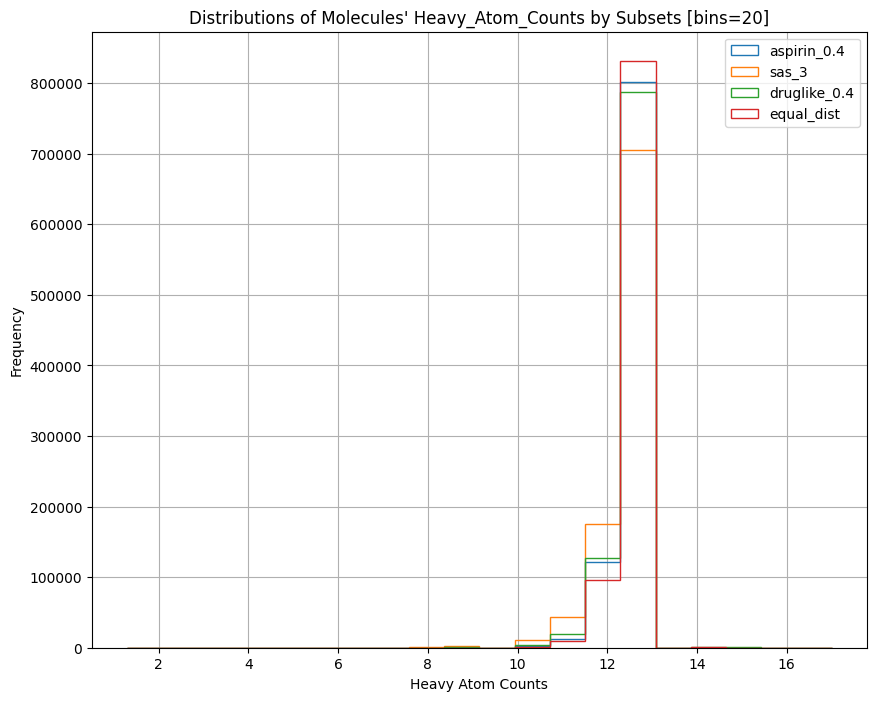

In [63]:
plt.figure(figsize=(10,8))
bins=20

# ploted_df = df[["aspirin_0.4_lenghts", "sas_3_lenghts"]]
ploted_df = df[["aspirin_0.4_lenghts", "sas_3_lenghts", "druglike_0.4_lenghts", "equal_dist_lenghts"]]

for k in ploted_df.columns:    
    ploted_df[k].hist(bins=bins, alpha=1, range=(1.3, 17), histtype = 'step', density=False)


plt.xlabel("Heavy Atom Counts")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title(f"Distributions of Molecules' Heavy_Atom_Counts by Subsets [bins={bins}]");
plt.legend([x.split("_len")[0] for x in ploted_df.columns], loc='upper right');

In [43]:
def randomize_smiles(mol, random_type="restricted"):
    if not mol:
        return None

    if random_type == "unrestricted":
        return Chem.MolToSmiles(mol, canonical=False, doRandom=True, isomericSmiles=False)
    
    if random_type == "restricted":
        new_atom_order = list(range(mol.GetNumHeavyAtoms()))
        random.shuffle(new_atom_order)
        random_mol = Chem.RenumberAtoms(mol, newOrder=new_atom_order)
        return Chem.MolToSmiles(random_mol, canonical=False, isomericSmiles=False)
    
    raise ValueError("Type '{}' is not valid".format(random_type))

In [9]:
sm = "CCC1COC2CNC1C2(N)CC"

In [10]:
mol = Chem.MolFromSmiles(sm)
mol

In [11]:
mol.GetNumHeavyAtoms()

13

In [2]:
df[["aspirin_0.4_lenghts"]]

NameError: name 'df' is not defined